# Lab 1

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [506]:
df = pd.read_excel('Online Retail.xlsx')

In [507]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### descriptive stats

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [509]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


### Null and missing values
The dataset source suggests that there are no missing values here. So we can assume that any null that occurs are intentional.

In [510]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

We can see above that the **1454** nulls in **Description** are left null due to lack of description provided at sale.
The **135080** nulls for the **CustomerID** suggest those sales were to wholesellers. 

To remedy this we will ignore the **Description** nulls and split the data into retail and wholesellers.

In [511]:
wholeseller = df[df['Description'].isna()]

In [512]:
retail = df[~df.index.isin(wholeseller.index)]

In [513]:
print(f"Wholesale - {len(wholeseller)} records\nSum of Quantity = {wholeseller.Quantity.sum()}\nMean of UnitPrice {wholeseller.UnitPrice.mean()}\nMay be anomalies")

Wholesale - 1454 records
Sum of Quantity = -13609
Mean of UnitPrice 0.0
May be anomalies


### Unique

In [514]:
df = retail

In [515]:
df.nunique()

InvoiceNo      24446
StockCode       3958
Description     4223
Quantity         671
InvoiceDate    22309
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

There are no indexable column as there is no unique identifier for each row. 

### Outlier removal

Text(0.5, 1.0, 'UnitPrice')

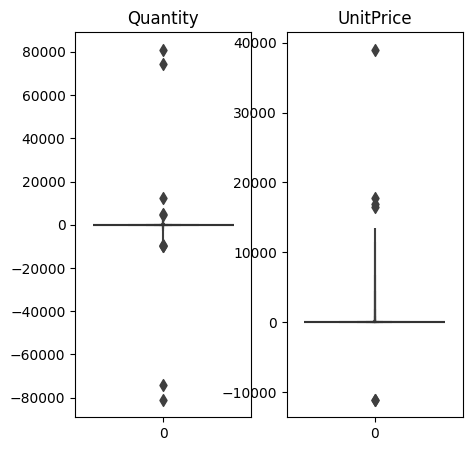

In [516]:
f,a = plt.subplots(1,2, figsize=(5,5))
sns.boxenplot(df['Quantity'],ax=a[0]);sns.boxenplot(df['UnitPrice'],ax=a[1]);a[0].set_title("Quantity");a[1].set_title("UnitPrice")

The plot above suggests that both the outlier in the positive side have been returned due to wrong billing. So I will remove these datapoints.

In [568]:
df['Quantityfr'] = (df['Quantity'] - df['Quantity'].mean())/df['Quantity'].std()
df['UnitPrice'] = (df['UnitPrice'] - df['UnitPrice'].mean())/df['UnitPrice'].std()
outlier_removed = df[(np.abs(df['UnitPrice']) < 2.5) & (np.abs(df['Quantityfr']) < 3) ]
outlier = df[~df.index.isin(outlier_removed.index)]
print(f"Number of outlier removed {len(outlier)}")

Number of outlier removed 12478


Text(0.5, 1.0, 'UnitPrice')

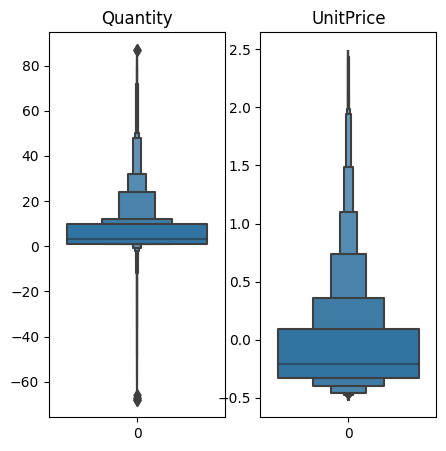

In [569]:
df = outlier_removed.drop(columns='Quantityfr')
f,a = plt.subplots(1,2, figsize=(5,5))
sns.boxenplot(df['Quantity'],ax=a[0]);sns.boxenplot(df['UnitPrice'],ax=a[1]);a[0].set_title("Quantity");a[1].set_title("UnitPrice")

array([[<Axes: title={'center': 'UnitPrice'}>,
        <Axes: title={'center': 'Quantity'}>]], dtype=object)

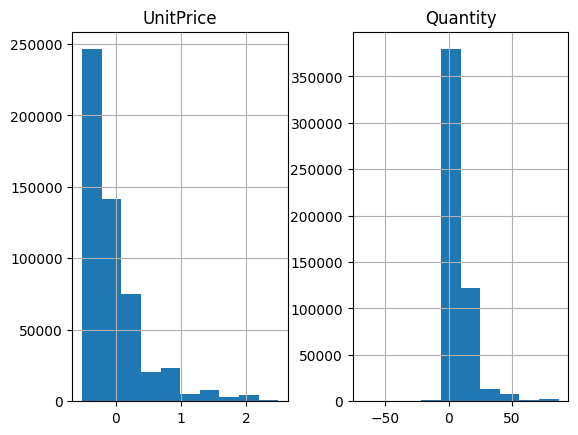

In [570]:
df[['UnitPrice','Quantity']].hist()

### Irrelevant data

In [571]:
df[df['Quantity'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,0.171095,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,-0.272174,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,-0.473123,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,-0.473123,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,-0.473123,17548.0,United Kingdom


All the negative quantites indicate a purchase return to the store. So we will store them in a different dataframe.

In [620]:
purchRe = outlier_removed[df['Quantity'] < 0]
purch = outlier_removed[df['Quantity'] > 0]

print(f'Percentage of sales as sales returns = {len(purchRe)/len(purch)*100}%')

Percentage of sales as sales returns = 1.7028048921640497%


## Sales Analysis

### Top ten best selling items by quantity

Total unique products 10


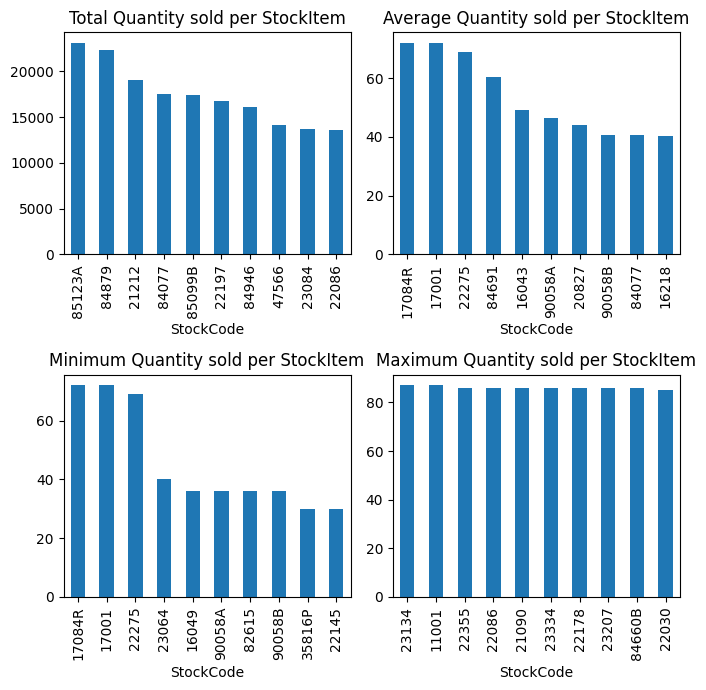

In [621]:
products = purch.groupby(['StockCode'])['Quantity'].sum().sort_values(ascending=False)[:10]
products_m = purch.groupby(['StockCode'])['Quantity'].mean().sort_values(ascending=False)[:10]
products_mi = purch.groupby(['StockCode'])['Quantity'].min().sort_values( ascending=False)[:10]
products_ma = purch.groupby(['StockCode'])['Quantity'].max().sort_values(ascending=False)[:10]

f,a = plt.subplots(2,2,figsize=(7,7))
products.plot(kind='bar',ax=a[0,0])
a[0,0].set_title("Total Quantity sold per StockItem")
print(f'Total unique products {len(products)}')
products_m.plot(kind='bar',ax=a[0,1])
products_mi.plot(kind='bar',ax=a[1,0])
products_ma.plot(kind='bar',ax=a[1,1])
a[0,1].set_title("Average Quantity sold per StockItem")
a[1,0].set_title("Minimum Quantity sold per StockItem")
a[1,1].set_title("Maximum Quantity sold per StockItem")

plt.tight_layout()

STOCK ITEM DESCRIPTION

In [622]:
desc = purch.groupby(['StockCode'])['Description'].max()
desc[products_m.index]

StockCode
17084R                  ASSORTED INCENSE PACK
17001      HEAVENS SCENT FRAGRANCE OILS ASSTD
22275        WEEKEND BAG VINTAGE ROSE PAISLEY
84691                      PACK 20 DOLLY PEGS
16043               POP ART PUSH DOWN RUBBER 
90058A    CRYSTAL STUD EARRINGS CLEAR DISPLAY
20827                     GOLD APERITIF GLASS
90058B    CRYSTAL STUD EARRINGS ASSORTED COL 
84077       WORLD WAR 2 GLIDERS ASSTD DESIGNS
16218              CARTOON  PENCIL SHARPENERS
Name: Description, dtype: object

### Total revenue generated by each product

In [623]:
purch['Sales'] = purch["Quantity"] + purch['UnitPrice']

/tmp/ipykernel_1378/858986068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purch['Sales'] = purch["Quantity"] + purch['UnitPrice']


Total unique products 10


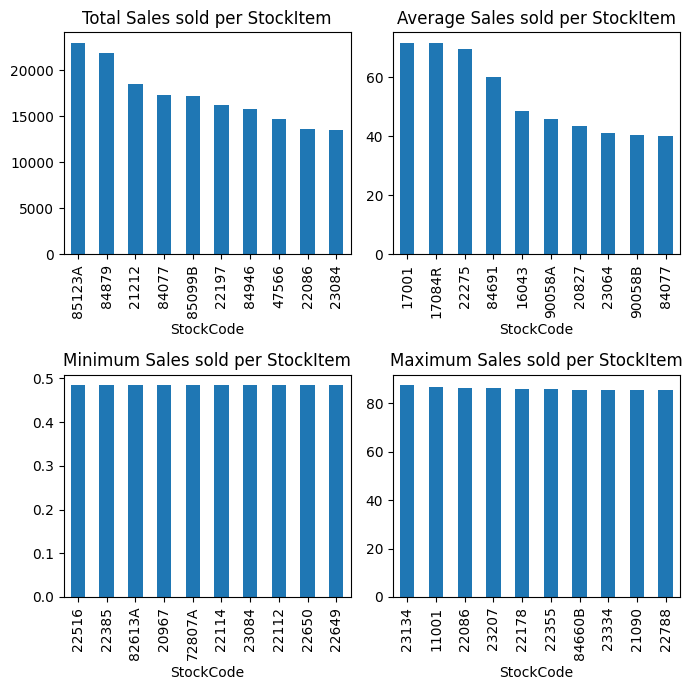

In [624]:
products = purch.groupby(['StockCode'])['Sales'].sum().sort_values(ascending=False)[:10]
products_m = purch.groupby(['StockCode'])['Sales'].mean().sort_values(ascending=False)[:10]
products_mi = purch.groupby(['StockCode'])['Sales'].min().sort_values( ascending=True)[:10]
products_ma = purch.groupby(['StockCode'])['Sales'].max().sort_values(ascending=False)[:10]

f,a = plt.subplots(2,2,figsize=(7,7))
products.plot(kind='bar',ax=a[0,0])
a[0,0].set_title("Total Sales sold per StockItem")
print(f'Total unique products {len(products)}')
products_m.plot(kind='bar',ax=a[0,1])
products_mi.plot(kind='bar',ax=a[1,0])
products_ma.plot(kind='bar',ax=a[1,1])
a[0,1].set_title("Average Sales sold per StockItem")
a[1,0].set_title("Minimum Sales sold per StockItem")
a[1,1].set_title("Maximum Sales sold per StockItem")

plt.tight_layout()

In [625]:
desc = purch.groupby(['StockCode'])['Description'].max()
desc[products_m.index]

StockCode
17001      HEAVENS SCENT FRAGRANCE OILS ASSTD
17084R                  ASSORTED INCENSE PACK
22275        WEEKEND BAG VINTAGE ROSE PAISLEY
84691                      PACK 20 DOLLY PEGS
16043               POP ART PUSH DOWN RUBBER 
90058A    CRYSTAL STUD EARRINGS CLEAR DISPLAY
20827                     GOLD APERITIF GLASS
23064                  CINDERELLA CHANDELIER 
90058B    CRYSTAL STUD EARRINGS ASSORTED COL 
84077       WORLD WAR 2 GLIDERS ASSTD DESIGNS
Name: Description, dtype: object

### Revenue trends

In [689]:
purch['month'] = purch.InvoiceDate.dt.month
purch['date'] = purch.InvoiceDate.dt.dayofyear
purch['day'] = purch.InvoiceDate.dt.day_of_week
purch['hr'] = purch.InvoiceDate.dt.hour
purch.head(1)

/tmp/ipykernel_1378/588154890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purch['month'] = purch.InvoiceDate.dt.month
/tmp/ipykernel_1378/588154890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purch['date'] = purch.InvoiceDate.dt.dayofyear
/tmp/ipykernel_1378/588154890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quantityfr,Sales,month,daey,day,date,hr
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,-0.139193,17850.0,United Kingdom,-0.127486,5.860807,12,1,2,335,8


In [690]:
mothd = {k:v for k,v in zip(list(range(1,12)),['January' ,'February' ,'March' ,'April', 'May' ,'June', 'July',
 'August', 'September' ,'October', 'November','December'])}
mothd

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November'}

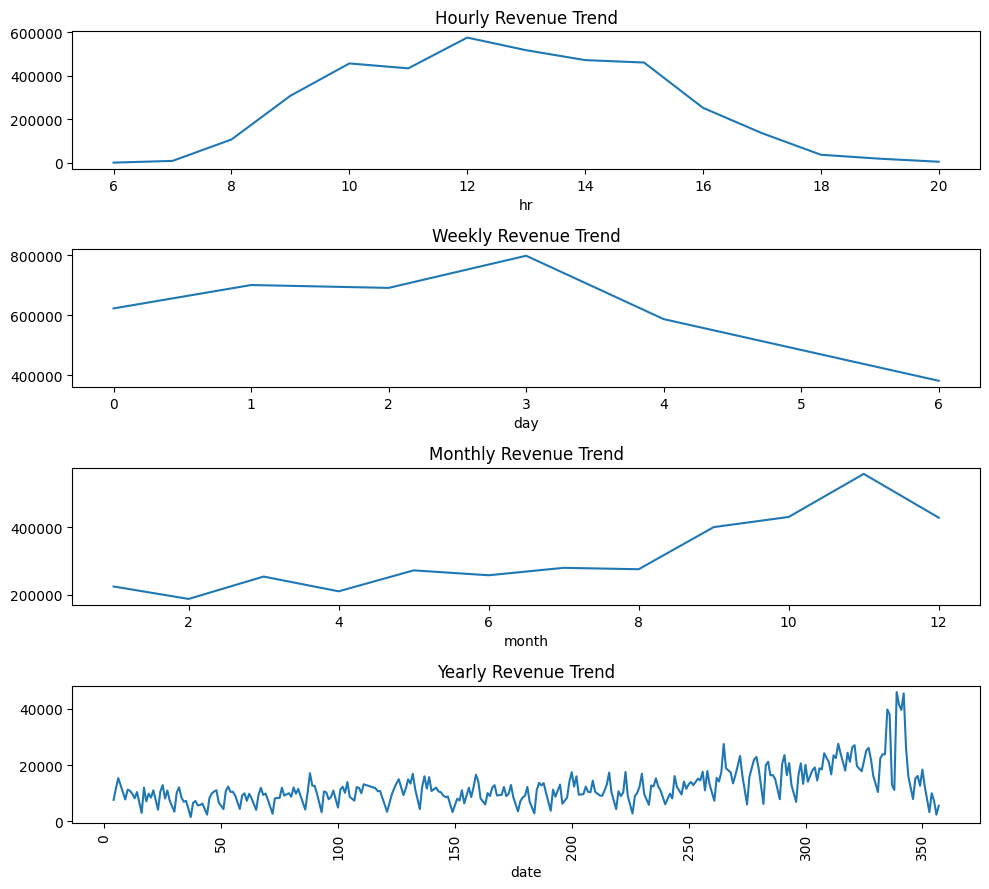

In [691]:
mn = purch.groupby(['hr'])['Sales'].sum()
mns = purch.groupby(['date',])['Sales'].sum()
mnz = purch.groupby(['month',])['Sales'].sum()
mnk = purch.groupby(['day',])['Sales'].sum()

f,a = plt.subplots(4,1,figsize=(10,9))
mns.plot(kind='line', title="Yearly Revenue Trend",ax=a[3])
mnz.plot(kind='line', title="Monthly Revenue Trend",ax=a[2])
mnk.plot(kind='line', title="Weekly Revenue Trend",ax=a[1])
mn.plot(kind='line', title="Hourly Revenue Trend",ax=a[0])


#sns.lineplot(data=monthly_revenuez)
plt.xticks(rotation=90)
plt.tight_layout()

## Customer behaviour

### Unique and Repeating customers 

In [692]:
print(f"Number of unique customers {purch.CustomerID.nunique()}")

Number of unique customers 4275


In [696]:
repe = purch.groupby("CustomerID")['Quantity'].count()
print(f'Percentage of repeat customer {(len(repe)-len(repe[repe == 1]))/len(repe)*100}')

Percentage of repeat customer 98.54970760233918


### Average order value

In [771]:
aov = purch.groupby(["InvoiceNo"])['Sales'].sum().sort_values(ascending=False)
print(f'Average order value = {aov.mean()}')
print(f'Total unique invoices = {len(aov)}')

Average order value = 195.2180686621862
Total unique invoices = 19353


In [772]:
aov

InvoiceNo
571653    4737.685290
573585    4641.261569
565150    3974.062656
558475    3909.828840
574328    3890.016165
             ...     
573987       0.484028
573988       0.484028
553719       0.484028
566324       0.484028
573990       0.484028
Name: Sales, Length: 19353, dtype: float64

<Axes: xlabel='InvoiceNo'>

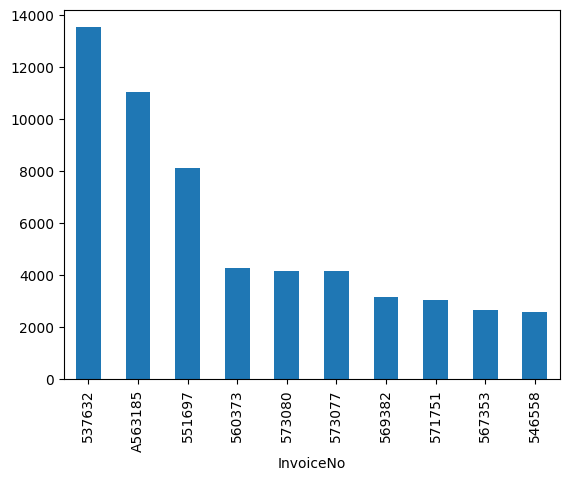

In [133]:
inv = purch.groupby('InvoiceNo')['Sales'].mean()
inv = inv.sort_values(ascending=False)[:100]
inv[:10].plot(kind='bar')

In [139]:
ind = list(inv.index)
new = purch.set_index('InvoiceNo')

In [155]:
purch['InvoiceNo'].isin(ind)

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: InvoiceNo, Length: 530932, dtype: bool

In [146]:
len(ind)

100

In [796]:
aov = purch.groupby(['Country','InvoiceNo'])['Sales'].sum().sort_values(ascending=False)


### Countries with most sales revenue

<Axes: title={'center': 'Countries by Average sales'}, xlabel='Country'>

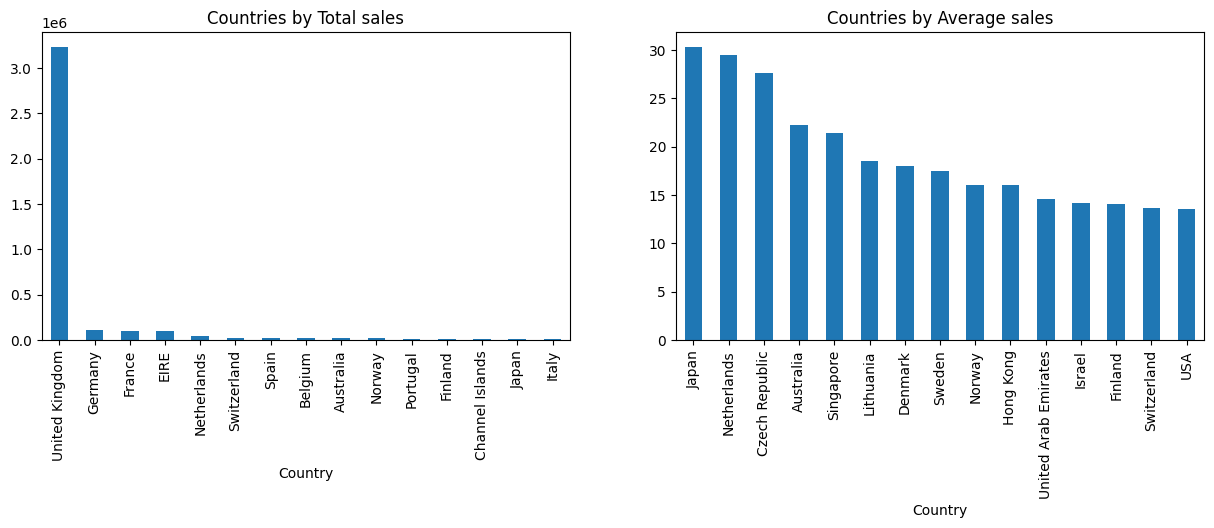

In [801]:
aov_by_country = purch.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(15)
aov_by_country2 = purch.groupby('Country')['Sales'].mean().sort_values(ascending=False).head(15)

f,a = plt.subplots(1,2,figsize=(15,4))
aov_by_country.plot(kind='bar',ax= a[0] ,title="Countries by Total sales")
aov_by_country2.plot(kind='bar',ax= a[1] ,title="Countries by Average sales")

UK dominating in sum of all sales and not appearing in average sales suggest that the primary country of operation is UK and the number of goods sold there is highest. 

In [806]:
purch.Country.value_counts()

Country
United Kingdom          476135
Germany                   8929
France                    8295
EIRE                      7450
Spain                     2392
Belgium                   2017
Switzerland               1894
Portugal                  1458
Netherlands               1341
Norway                    1024
Australia                  803
Channel Islands            736
Italy                      735
Finland                    635
Cyprus                     596
Unspecified                446
Austria                    380
Denmark                    370
Poland                     322
Sweden                     299
Israel                     289
Hong Kong                  275
Japan                      247
Singapore                  207
Iceland                    181
USA                        179
Canada                     148
Greece                     141
Malta                      109
United Arab Emirates        67
European Community          60
RSA                         58


## Product performance

### Top 5 countries with highest average Sales Revenue per transaction 

<Axes: xlabel='Country'>

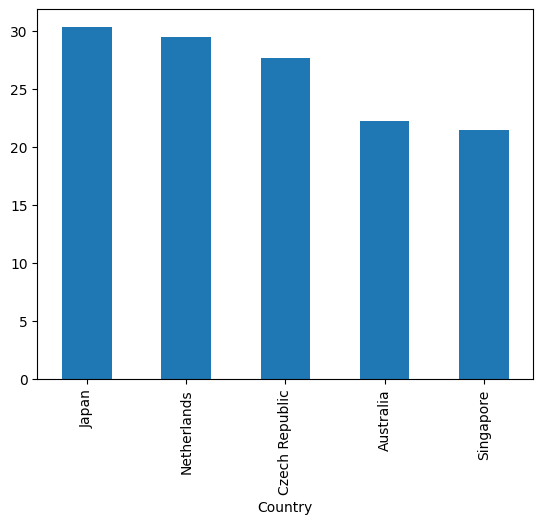

In [811]:
pod = purch.groupby('Country')['Sales'].mean().sort_values(ascending=False)
pod[:5].plot(kind='bar')


### Trends in certain products

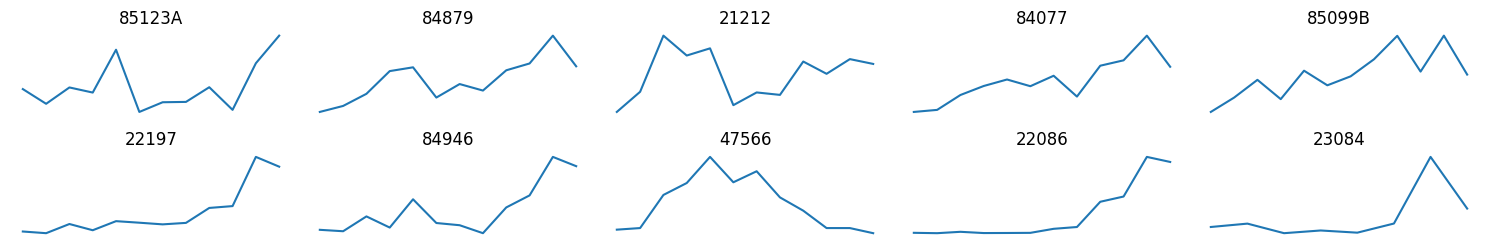

In [832]:
items = products.index
f = plt.figure(figsize=(15,5), clear=True)
for l,i in enumerate(items):
    f.add_subplot(4,5,l+1)
    refe = purch[purch['StockCode'] == i]
    refe.groupby('month')['Sales'].sum().plot(kind='line')
    plt.title(f'{i}')
    plt.axis("OFF")
    plt.tight_layout()
